<a href="https://colab.research.google.com/github/NikosAng/UEA-macro-lectures/blob/main/History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Evolution of Time-Series Analysis in Macroeconomics  
*From Slutsky & Frisch to Cointegration*

---

## Learning goals
1. Connect early “impulse–propagation” ideas to today’s stochastic-process view.  
2. Understand economic meaning of **stationarity**, **unit roots**, **persistence**, and **cointegration**.  
3. Run miniature Python demos that make each concept tangible.


## 1 Mechanistic Origins: Slutsky & Frisch

**Slutsky (1927)** – *The Summation of Random Causes*  
- Summing i.i.d. shocks through a moving-average filter can produce smooth, quasi-cyclical waves that resemble business cycles.

**Frisch (1933)** – *Impulse–Propagation*  
- A damped economic system, when struck by random impulses, sustains oscillations indefinitely.  
- Frisch’s analogy:  
  > “A stream of erratic shocks that constantly upsets the continuous evolution, and by so doing introduces into the system the energy necessary to maintain the swings.”

Below is a simple Python demo of the **Slutsky effect**.


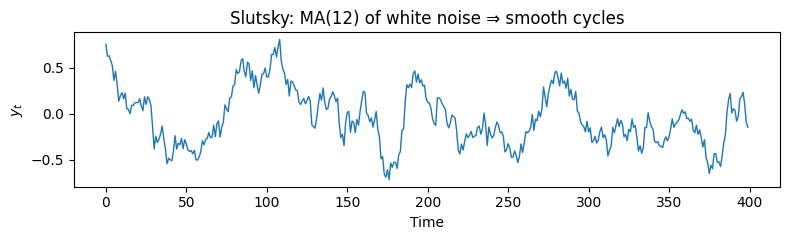

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate moving-average (Slutsky effect)
np.random.seed(0)
n, q = 400, 12
eps = np.random.normal(0, 1, n + q)
theta = np.ones(q + 1) / (q + 1)  # equal weights for MA(q)
y = np.convolve(eps, theta, mode='valid')

plt.figure(figsize=(8, 2.5))
plt.plot(y, lw=1)
plt.title("Slutsky: MA(12) of white noise ⇒ smooth cycles")
plt.xlabel("Time")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()


## 2 Wold’s Decomposition (1938)

**Wold’s Theorem**: Any zero-mean covariance-stationary series $\{y_t\}$ has a moving-average representation

$$
y_t \;=\; \sum_{j=0}^{\infty} b_j\,\varepsilon_{t-j} \;+\; \eta_t,
$$

- $\{\varepsilon_t\}$ is white-noise (innovations)  
- $\{b_j\}$ are weights (absolutely summable)  
- $\eta_t$ is a deterministic component (e.g., fixed seasonal cycle)

Economically, the $b_j$ sequence describes **how shocks propagate** through time. In practice we approximate this infinite sum with a finite-order ARMA model.

**Special case: AR(1)**

$$
y_t = \phi\,y_{t-1} + \varepsilon_t
\quad\Longrightarrow\quad
y_t = \sum_{j=0}^{\infty} \phi^j\,\varepsilon_{t-j}.
$$

Here $b_j = \phi^j$, showing exponential decay of shock effects when $|\phi|<1$.


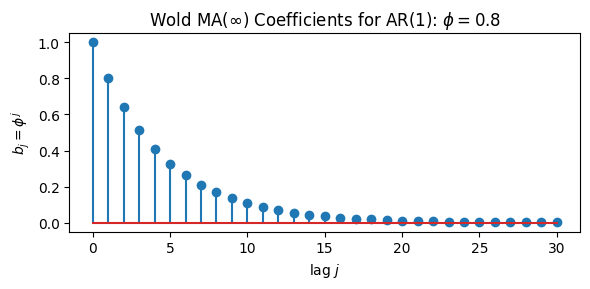

In [3]:
import numpy as np
import matplotlib.pyplot as plt

phi = 0.8
maxlag = 30
b = [phi**j for j in range(maxlag+1)]

plt.figure(figsize=(6,3))
plt.stem(range(maxlag+1), b)                   # <— removed use_line_collection
plt.xlabel('lag $j$')
plt.ylabel('$b_j = \\phi^j$')
plt.title('Wold MA($\\infty$) Coefficients for AR(1): $\\phi=0.8$')
plt.tight_layout()
plt.show()



## 3 ARIMA & the Box–Jenkins Revolution

By mid-20th century, after suitable detrending, macro series were modeled as **stationary ARMA** processes.  
Box & Jenkins (1976) systematized this into the **ARIMA** framework: “Autoregressive Integrated Moving Average” models.

An ARIMA\((p,d,q)\) model is
\[
  (1 - L)^d Y_t \;=\; \phi(L)^{-1}\,\theta(L)\,\varepsilon_t,
\]
where  
- \(L\) is the lag operator (\(LY_t = Y_{t-1}\)),  
- \(\phi(L) = 1 - \phi_1 L - \cdots - \phi_p L^p\) (AR polynomial),  
- \(\theta(L) = 1 + \theta_1 L + \cdots + \theta_q L^q\) (MA polynomial).

- If \((p,d,q)=(0,1,0)\),  
  \[
    \Delta Y_t = \varepsilon_t
    \quad\Longleftrightarrow\quad
    Y_t = Y_{t-1} + \varepsilon_t
  \]
  (Random walk with unit root).

- If \((p,d,q)=(1,1,0)\),  
  \[
    \Delta Y_t = \phi_1\,\Delta Y_{t-1} + \varepsilon_t
    \quad\Longleftrightarrow\quad
    Y_t = Y_{t-1} + \phi_1(Y_{t-1} - Y_{t-2}) + \varepsilon_t.
  \]

**Box–Jenkins Methodology**:
1. **Identification**: Examine ACF/PACF to choose \((p,d,q)\).  
2. **Estimation**: Fit the model (e.g., maximum likelihood).  
3. **Diagnostic checking**: Ensure residuals \(\{\hat\varepsilon_t\}\) are white noise, parameters significant.

> ARIMA unifies unit-root (integration) and ARMA behavior in one flexible framework—powerful for forecasting GDP, inflation, etc., based on data-driven autocorrelation patterns.


                               SARIMAX Results                                
Dep. Variable:                  GDPC1   No. Observations:                  300
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 891.562
Date:                Fri, 25 Apr 2025   AIC                          -1779.125
Time:                        16:13:20   BIC                          -1771.724
Sample:                    01-01-1950   HQIC                         -1776.163
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4073      0.026     15.571      0.000       0.356       0.459
sigma2         0.0002   5.53e-06     27.190      0.000       0.000       0.000
Ljung-Box (L1) (Q):                  24.48   Jarque-

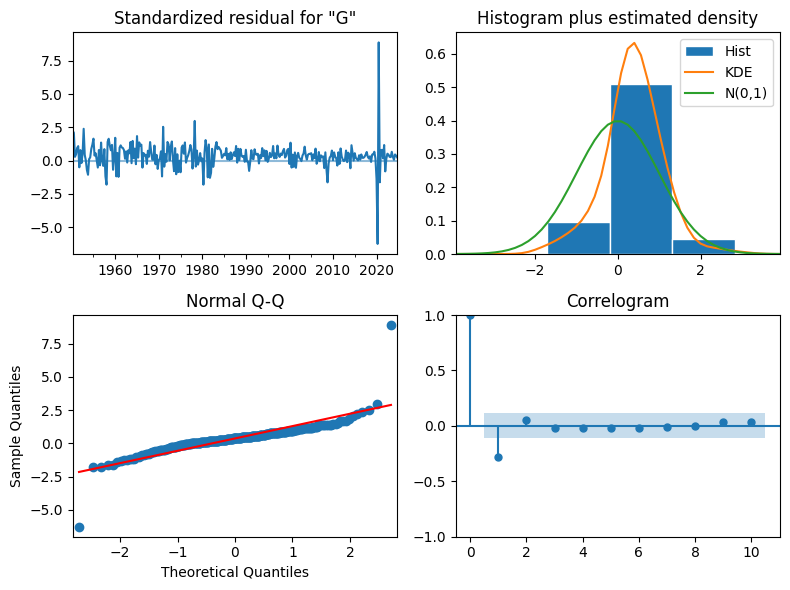

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas_datareader import data as web

# Fetch US real GDP (quarterly)
gdp = web.DataReader('GDPC1', 'fred', start='1950-01-01')
gdp_log = np.log(gdp).dropna()

# Fit an ARIMA(1,1,0) model
model = sm.tsa.ARIMA(gdp_log, order=(1,1,0))
result = model.fit()

# Print summary and plot diagnostics
print(result.summary())
result.plot_diagnostics(figsize=(8,6))
plt.tight_layout()
plt.show()


## 4 Stationarity & the Rise of Unit Roots

Although ARMA/ARIMA models were successful, they assumed any trend was deterministic or removed by pre‐filtering. Macro theory often treated “cycles” as deviations around a fixed growth path. This assumption was challenged by formal stationarity tests in the late 1970s–early 1980s:

**Dickey–Fuller (1979)**:
$$
\Delta y_t = \alpha + \beta\,t + \gamma\,y_{t-1} + \sum_{i=1}^p \delta_i\,\Delta y_{t-i} + \varepsilon_t,
$$
- Null \(H_0\): \(\gamma=0\) (unit root, non‐stationary)  
- Alternative \(H_1\): \(\gamma<0\) (stationary)  

**Nelson & Plosser (1982)** applied ADF tests to long U.S. series and found that many (GDP, wages, employment) behave like non‐stationary processes with **permanent shocks**.

- **Difference‐stationary** \((I(1))\): \(\Delta X_t\) is stationary, \(X_t\) has a unit root.  
- **Trend‐stationary**: \(X_t = \beta_0 + \beta_1\,t + u_t\) with \(u_t\) stationary.  

This shift led to ARIMA models with \(d>0\), routine differencing of macro data, and caution against **spurious regressions** among trending variables.


ADF p-value (log GDP level): 0.731
ADF p-value (Δ log GDP): 0.000
KPSS p-value (log GDP level): 0.010
KPSS p-value (Δ log GDP): 0.030


<ipython-input-5-459c0651766e>:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_lvl = kpss(loggdp, regression='ct', nlags='auto')


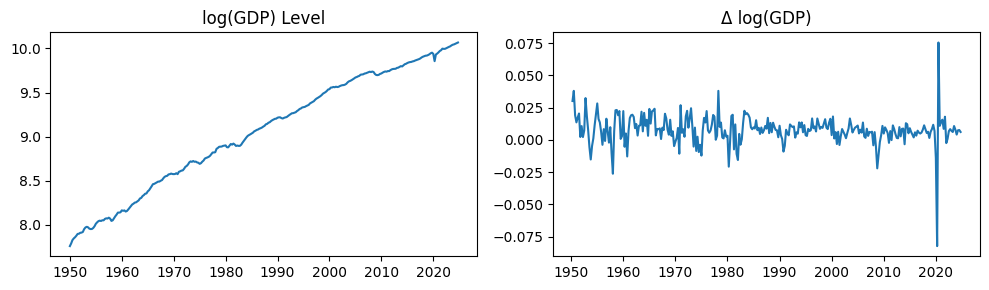

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from statsmodels.tsa.stattools import adfuller, kpss

# 1) Fetch data
gdp = web.DataReader('GDPC1', 'fred', start='1950-01-01')
loggdp = np.log(gdp['GDPC1']).dropna()
dloggdp = loggdp.diff().dropna()

# 2) ADF tests
adf_lvl = adfuller(loggdp, regression='ct', maxlag=4)
adf_diff = adfuller(dloggdp, regression='c', maxlag=2)
print(f"ADF p-value (log GDP level): {adf_lvl[1]:.3f}")
print(f"ADF p-value (Δ log GDP): {adf_diff[1]:.3f}")

# 3) KPSS tests
kpss_lvl = kpss(loggdp, regression='ct', nlags='auto')
kpss_diff = kpss(dloggdp, regression='c', nlags='auto')
print(f"KPSS p-value (log GDP level): {kpss_lvl[1]:.3f}")
print(f"KPSS p-value (Δ log GDP): {kpss_diff[1]:.3f}")

# 4) Plot level vs growth
plt.figure(figsize=(10,3))
plt.subplot(1,2,1); plt.plot(loggdp); plt.title('log(GDP) Level')
plt.subplot(1,2,2); plt.plot(dloggdp); plt.title('Δ log(GDP)')
plt.tight_layout(); plt.show()


## 5 Cointegration: Long-Run Equilibria Among Trends

While many series proved non-stationary, some combinations of $I(1)$ variables remain stationary.  
This is **cointegration** (Engle & Granger 1987):

> “If several time series are individually integrated of order $d$ but a linear combination of them is integrated of a lower order, then those series are said to be cointegrated.”  

Formally, if $X_t,Y_t\sim I(1)$, they are cointegrated if
$$
u_t = Y_t - \beta\,X_t
$$
is $I(0)$ (stationary).

A classic case is output and consumption (or capital): each wanders, but the ratio is mean-reverting.

**Engle–Granger two-step test**:
1. Estimate $$Y_t = \delta_0 + \delta_1\,X_t + u_t$$ by OLS.  
2. Test $\hat u_t$ for a unit root (ADF).  If stationary, $X,Y$ are cointegrated.

This also implies an **Error-Correction Model**:
$$
\Delta Y_t = \alpha\,(Y_{t-1} - \beta X_{t-1}) \;+\;\gamma\,\Delta X_t \;+\;\sum\phi_i\,\Delta Y_{t-i} + \varepsilon_t,
$$
where $(Y_{t-1}-\beta X_{t-1})$ “pulls” $Y$ back to its long-run path.

**Johansen (1988, 1991)** extended this to multivariate VARs, estimating up to $r$ cointegrating vectors via eigenvalue tests.


Engle–Granger test p-value (C vs GDP): 0.4856
ADF on residuals p-value: 0.2500


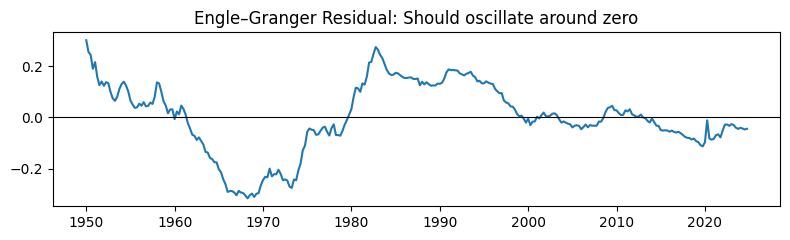

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from statsmodels.tsa.stattools import coint, adfuller

# 1) Fetch quarterly real GDP and real consumption
gdp = web.DataReader('GDPC1', 'fred', start='1950-01-01')
c   = web.DataReader('PCEC', 'fred', start='1950-01-01')

# Log-transform and align
df = pd.concat([np.log(gdp['GDPC1']), np.log(c['PCEC'])], axis=1).dropna()
df.columns = ['logGDP', 'logC']

# 2) Engle–Granger cointegration test
score, pvalue, _ = coint(df['logC'], df['logGDP'])
print(f"Engle–Granger test p-value (C vs GDP): {pvalue:.4f}")

# 3) Estimate long-run regression and extract residuals
import statsmodels.api as sm
res = sm.OLS(df['logC'], sm.add_constant(df['logGDP'])).fit()
df['resid'] = res.resid

# 4) ADF on residuals
adf_resid = adfuller(df['resid'], regression='c', maxlag=4)
print(f"ADF on residuals p-value: {adf_resid[1]:.4f}")

# 5) Plot residual (should look stationary if cointegrated)
plt.figure(figsize=(8,2.5))
plt.plot(df['resid'])
plt.axhline(0, color='k', linewidth=0.8)
plt.title('Engle–Granger Residual: Should oscillate around zero')
plt.tight_layout()
plt.show()
